In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import yfinance as yf

In [6]:
# Definindo os tickers
tickers = ["AAPL","MSFT","GOOGL","AMZN","TSLA"]

data_fim = dt.date.today()
data_inicio = data_fim - timedelta(days=720)

dados = yf.download(tickers, start=data_inicio, end=data_fim)

# Transformando os dados em um DataFrame
df = pd.DataFrame(dados['Close'])

# Mostrando que o df vem em dados diários
df.tail(15)

[*********************100%%**********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2024-05-06,181.710007,188.699997,168.100006,413.540009,184.759995
2024-05-07,182.399994,188.759995,171.250000,409.339996,177.809998
2024-05-08,182.740005,188.000000,169.380005,410.540009,174.720001
2024-05-09,184.570007,189.500000,169.960007,412.320007,171.970001
2024-05-10,183.050003,187.479996,168.649994,414.739990,168.470001
2024-05-13,186.279999,186.570007,169.139999,413.720001,171.889999
2024-05-14,187.429993,187.070007,170.339996,416.559998,177.550003
2024-05-15,189.720001,185.990005,172.509995,423.079987,173.990005
2024-05-16,189.839996,183.630005,174.179993,420.989990,174.839996


C:\Users\felip\AppData\Local\Temp\ipykernel_12436\4025309689.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


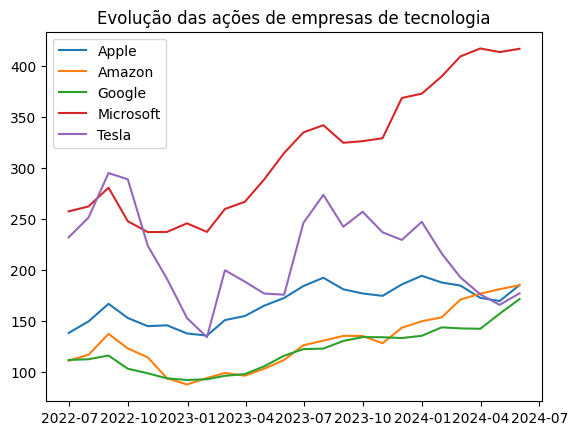

In [3]:
df_monthly= (df
             .resample('M') # Transforma de diário para mensal calculando pela média
             .mean()
             .rename(columns={'AAPL':'Apple', 'AMZN':'Amazon','GOOGL':'Google','TSLA':'Tesla','MSFT':'Microsoft'}))
df_monthly

fig, ax = plt.subplots()
ax.plot(df_monthly)

ax.set_title('Evolução das ações de empresas de tecnologia')
ax.legend(df_monthly.columns)
plt.show()

In [4]:
# Corrigindo coluna de data
df_monthly.index = df_monthly.index.strftime('%b/%y')

C:\Users\felip\AppData\Local\Temp\ipykernel_12436\1938643610.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_monthly.index, rotation=60)


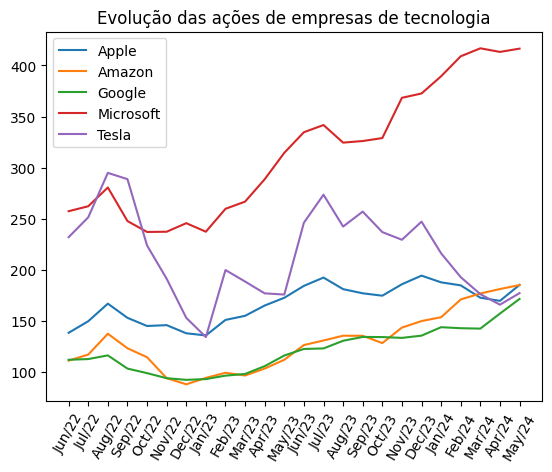

In [5]:
# Plota o gráfico corrigido
fig, ax = plt.subplots()
ax.plot(df_monthly)

ax.set_title('Evolução das ações de empresas de tecnologia')
ax.legend(df_monthly.columns)
ax.set_xticklabels(df_monthly.index, rotation=60)
plt.show()

#Você é um estagiário de research em um grande banco de investimento na sua primeira semana de emprego. Seu chefe, sabendo que voce foi um membro da fea dev, quer testas suas habilidades em python. Para isso, ele pede que você faça um gráfico com média mensal da precificação das ações de 5 das maiores empresas de tecnologia (Microsoft, Apple, Google, Amazon e Tesla).